# ID5030 Assignment 2 - Solution

#### By: P Akhil Reddy    
#### Roll Number: CH20B076

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams['font.size'] = 20

In [3]:
df = pd.read_excel('Concrete_Data.xls')

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
X = np.array(df.drop(axis=1, columns=['Concrete compressive strength(MPa, megapascals) ']).values)
y = np.array(df['Concrete compressive strength(MPa, megapascals) '].values)

## Part 1 - Training linear regression model using normal equation method.

#### Adding a column of ones to represent the bias term

In [7]:
# X_old is the dataset which does not contain the column of ones, will be kept for later use
X_old = X 
X = np.hstack([np.ones((X.shape[0], 1)), X])

#### Splitting the dataset into train and test datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Implementing linear regression algorithm using normal equation method

In [9]:
theta = np.array(np.linalg.inv((X_train.T @ X_train)) @ X_train.T @ y_train)

#### Making predictions for train dataset

In [10]:
y_train_pred = X_train@(theta.T)

In [11]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Mean squared error of the model on the train dataset: {}'.format(mse_train))
print('r-squared value of the model on the train dataset: {}'.format(r2_train))

Mean squared error of the model on the train dataset: 107.25842311011503
r-squared value of the model on the train dataset: 0.6196006621677799


#### Making predictions for test dataset

In [12]:
y_test_pred = X_test@(theta.T)

In [13]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Mean squared error of the model on the test dataset: {}'.format(mse_test))
print('r-squared value of the model on the test dataset: {}'.format(r2_test))

Mean squared error of the model on the test dataset: 109.75614063735658
r-squared value of the model on the test dataset: 0.5943642890037111


For the previous assignment where linear regression was implemented using scikit-learn,    
(for random state = 42 while splitting train and test datasets)    

Mean squared error of the model on the train dataset: 107.25842311011506    
r-squared value of the model on the train dataset: 0.6196006621677799

Mean squared error of the model on the test dataset: 109.75614063734939    
r-squared value of the model on the test dataset: 0.5943642890037375

So, the model trained with the normal equation and the scikit-learn model are almost equally good.

## Part2 - L2 regularisation is introduced in the model.
Note: We will continue using the normal equation method to solve the linear regression problem    
   
Now, we will solve for different values of the regularisation parameter `lambda`

In [14]:
# Helper function for implementing linear regression with regularisation
def train_and_report(lamb = 0):

    # Solving the L2 regularised regression problem using normal equation
    theta = np.array(np.linalg.inv((X_train.T @ X_train) + lamb*np.identity(X_train.shape[1])) @ X_train.T @ y_train)

    y_train_pred = X_train@(theta.T)
    y_test_pred = X_test@(theta.T)

    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return (mse_train, r2_train, mse_test, r2_test)

### Training the regularised model for different values of lambda and reporting results

In [15]:
mse_train = []
r2_train = []
mse_test = []
r2_test = []

for i in range(-10, 9):
    mse_tr, r2_tr, mse_te, r2_te = train_and_report(10**i)
    mse_train.append(mse_tr)
    r2_train.append(r2_tr)
    mse_test.append(mse_te)
    r2_test.append(r2_te)

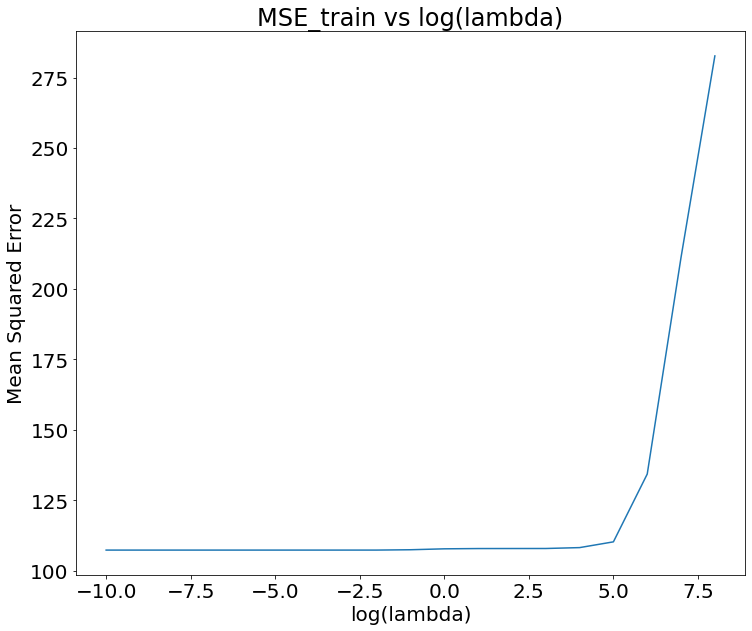

In [16]:
fig, ax = plt.subplots()
ax.plot(range(-10, 9), mse_train)
ax.set_title('MSE_train vs log(lambda)')
ax.set_xlabel('log(lambda)')
ax.set_ylabel('Mean Squared Error');

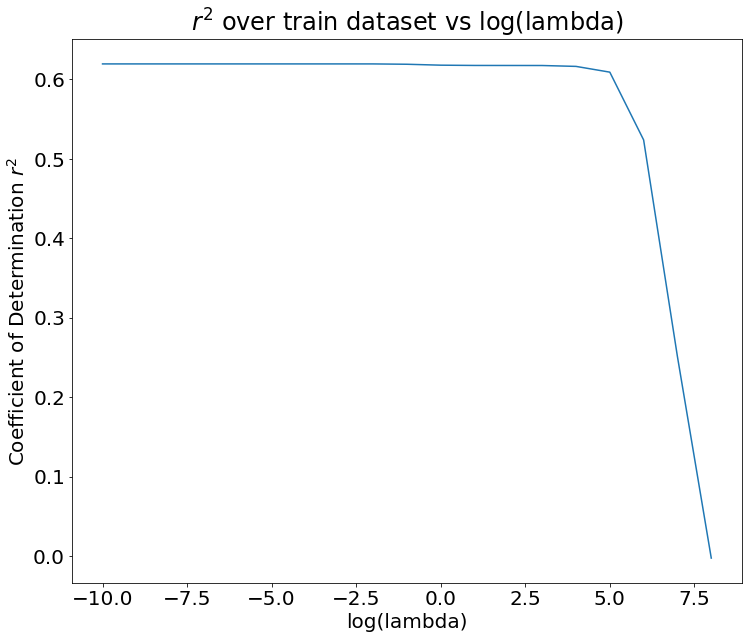

In [17]:
fig, ax = plt.subplots()
ax.plot(range(-10, 9), r2_train)
ax.set_title('$r^2$ over train dataset vs log(lambda)')
ax.set_xlabel('log(lambda)')
ax.set_ylabel('Coefficient of Determination $r^2$');

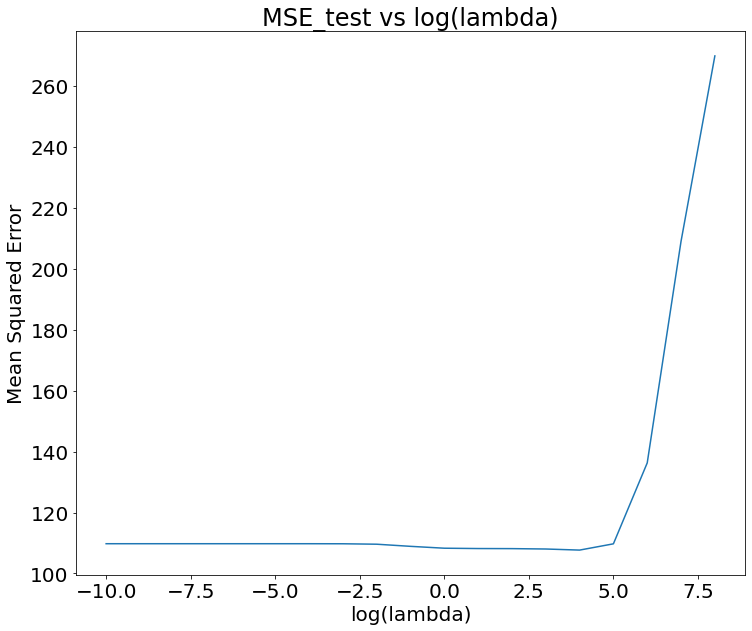

In [18]:
fig, ax = plt.subplots()
ax.plot(range(-10, 9), mse_test)
ax.set_title('MSE_test vs log(lambda)')
ax.set_xlabel('log(lambda)')
ax.set_ylabel('Mean Squared Error');

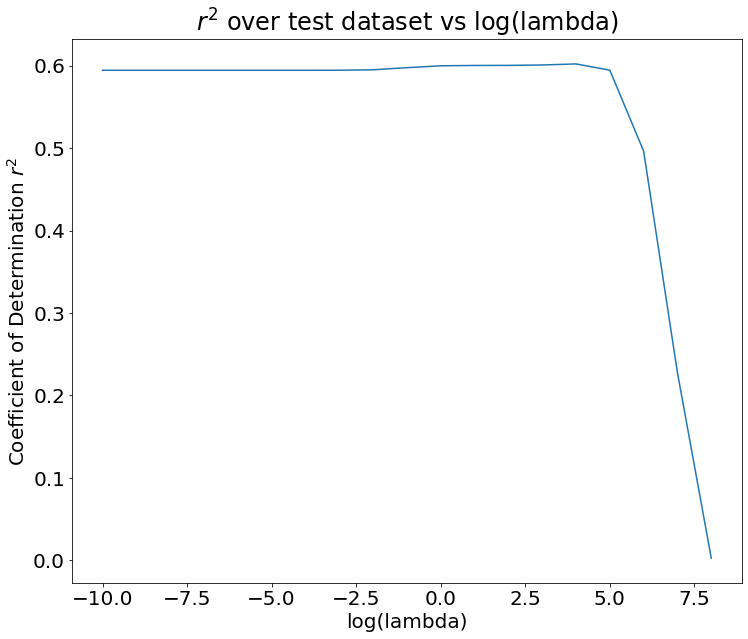

In [19]:
fig, ax = plt.subplots()
ax.plot(range(-10, 9), r2_test)
ax.set_title('$r^2$ over test dataset vs log(lambda)')
ax.set_xlabel('log(lambda)')
ax.set_ylabel('Coefficient of Determination $r^2$');

#### a. On training the model for different lambda values, it is observed that the model's performance on the test dataset gradually improves on increasing the value of lambda to a certain order (10<sup>4</sup>), after then the performance declines.

#### b. The model was earlier overfitting on the train dataset, as it tried to memorise all the information in the train dataset and build a complex relation. Regularisation reduced the importance of certain features and forced the learning algorithm to build a less complex model, helping to generalise better.

#### If we increase the lambda value too much then it will lead to underfitting.

## Part 3 - Quadratic model instead of linear model

In [20]:
quad = PolynomialFeatures(2)
X_new = quad.fit_transform(X_old)
# Here we are using X_old because the quad object will anyway create a column of ones to represent the bias term, so no need of adding it beforehand

In [21]:
X_new.shape

(1030, 45)

#### a. We see that there are total 45 features (including the column of ones that represents the bias term)

#### b. Now solving again the linear regression problem using normal equation method

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

theta = np.array(np.linalg.inv((X_train.T @ X_train)) @ X_train.T @ y_train)

#### Making predictions and reporting results for train and test datasets

In [23]:
y_train_pred = X_train@(theta.T)
y_test_pred = X_test@(theta.T)

In [24]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Mean squared error of the model on the train dataset: {}'.format(mse_train))
print('r-squared value of the model on the train dataset: {}'.format(r2_train))

Mean squared error of the model on the train dataset: 51.599771287198465
r-squared value of the model on the train dataset: 0.8169978798793918


In [25]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Mean squared error of the model on the test dataset: {}'.format(mse_test))
print('r-squared value of the model on the test dataset: {}'.format(r2_test))

Mean squared error of the model on the test dataset: 60.041133169083835
r-squared value of the model on the test dataset: 0.7781005454397802


### With only linear features:
Mean squared error of the model on the train dataset: 107.25842311011506    
r-squared value of the model on the train dataset: 0.6196006621677799

Mean squared error of the model on the test dataset: 109.75614063734939    
r-squared value of the model on the test dataset: 0.5943642890037375

### With quadratic features:
Mean squared error of the model on the train dataset: 51.599771287198465    
r-squared value of the model on the train dataset: 0.8169978798793918

Mean squared error of the model on the test dataset: 60.041133169083835    
r-squared value of the model on the test dataset: 0.7781005454397802

#### c. We see that the performance has improved significantly on adding quadratic features.

#### d. Number of features for cubic model.

In [26]:
X_old.shape

(1030, 8)

In [27]:
cubic = PolynomialFeatures(3)
X_cubic = cubic.fit_transform(X_old)
X_cubic.shape

(1030, 165)

#### We would need 165 features if we trained a cubic model.